# DSLabs functions

In [1]:
%run "scripts/dslabs_functions.py"


# Data functions

In [2]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [3]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_scaling_input.csv'

file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False

# already scaled daily data
data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

# aggregate unscaled data to weekly and monthly sums. 
# note: not all variables are suited for sum aggregation. 
# use like this just for illustation on target studies (which will be scaled afterwards)
unscaled_data = pd.read_csv(r'data/df_merch_0_2024_agg_time_mv_input.csv', decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)
unscaled_weekly=unscaled_data.resample('W').sum()
unscaled_monthly=unscaled_data.resample('M').sum()

 
target='Sessions'
series: Series = data[target]


test_split_threshold = 0.75

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# no aggregation

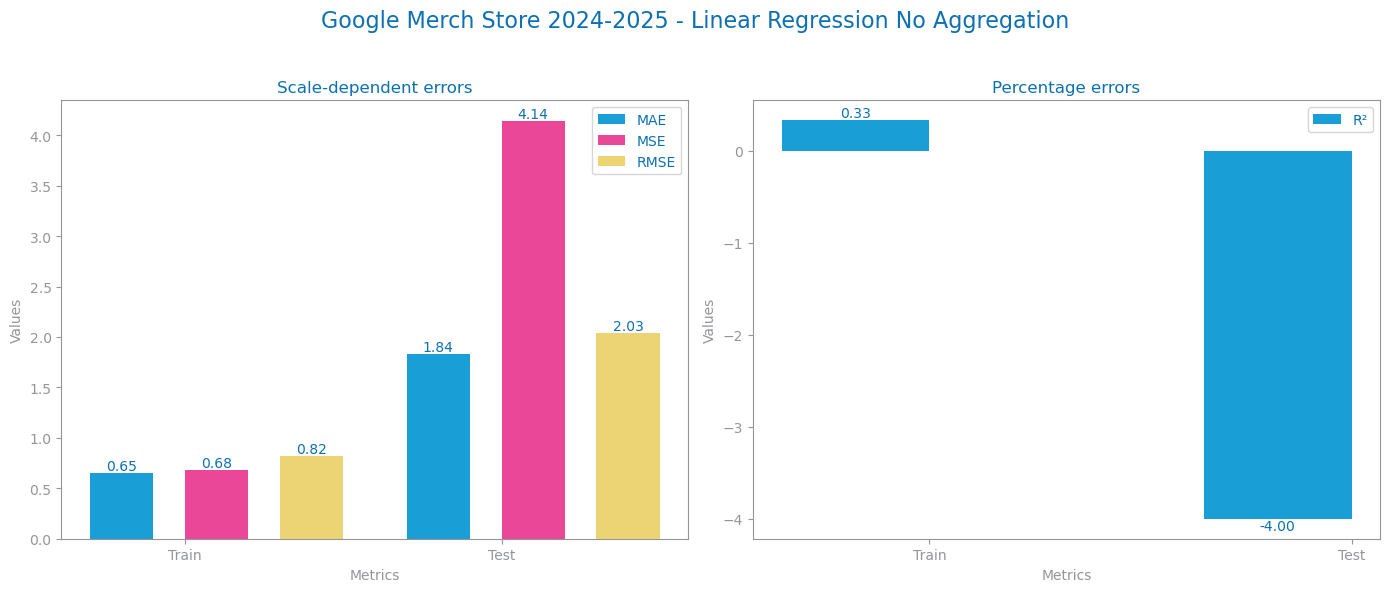

<Figure size 640x480 with 0 Axes>

In [4]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."



# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()



# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Aggregation")
savefig(f"images/{file_tag}_linear_regression_eval_no_aggreagation.png")

## no aggregation plot

<Axes: xlabel='Date', ylabel='Sessions'>

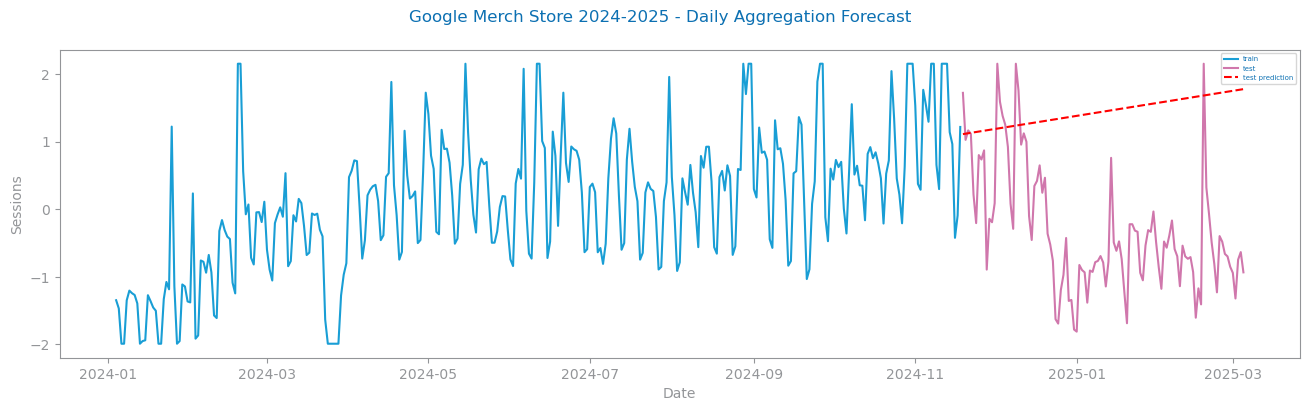

In [5]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - Daily Aggregation Forecast",
    xlabel='Date',
    ylabel=target,
)

# Aggregation - Weekly

## Aggregation Weekly strategy Application

In [6]:

from sklearn.preprocessing import StandardScaler


def apply_strategy_1(df):

    
    
    df_copy=unscaled_weekly.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)

    
    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-07,-2.195602,-2.627224,-2.856392,-0.906075,-0.725126,-0.863527,-1.035523,-2.259524,-1.022907,-1.005480,...,-0.980417,-0.534678,-0.513306,-1.854475,-0.709224,-0.883532,-0.426180,0.116581,0.128037,-0.489898
2024-01-14,-1.563629,-1.774234,-2.558774,1.746039,-0.316467,-0.431520,-0.618124,-0.390620,-0.584432,2.155777,...,-0.835909,-0.534678,-0.396970,-0.611781,-0.709224,-0.775164,-0.426180,-0.414892,0.128037,-0.489898
2024-01-21,-1.741512,-1.791517,-2.285160,1.406094,-0.562724,-0.685642,-0.898221,-1.648509,-1.080409,1.126200,...,-0.898587,-0.534678,-0.472162,-0.844118,-0.709224,-0.834983,-0.426180,-0.414892,0.128037,2.041241
2024-01-28,-1.130555,-1.434920,-1.924181,1.362059,-0.116914,-0.291753,-0.283107,-1.343584,-0.745245,1.704768,...,-0.966489,-0.534678,2.457514,-0.579682,-0.709224,-0.820245,-0.426180,-0.414892,0.128037,-0.489898
2024-02-04,-1.291550,-1.322248,-1.611189,1.204373,-0.099931,-0.290165,-0.288599,-0.552568,-0.428671,2.256835,...,-0.992605,-0.534678,1.000479,-0.567454,-0.709224,-0.828047,-0.426180,-0.840071,0.128037,-0.489898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-09,-0.629180,-0.613857,-0.578217,0.351022,-0.362640,-0.591935,-0.645585,1.152049,-0.433522,0.323313,...,0.675337,-0.534678,-0.524655,-0.037054,-0.709224,-0.355561,-0.426180,-1.158956,0.128037,-0.489898
2025-02-16,-0.974626,-0.792825,-0.641235,0.543603,-0.523450,-0.531581,-0.733458,0.532115,-0.614127,0.800833,...,0.724087,-0.534678,-0.541680,-0.322889,-0.709224,-0.620847,-0.426180,-1.158956,0.128037,-0.489898
2025-02-23,-0.253523,-0.495201,-0.599724,0.708373,-0.057472,-0.417226,-0.568695,0.649918,-0.414728,0.918527,...,0.365427,-0.534678,2.250380,0.034786,-0.709224,0.632760,-0.426180,-1.158956,0.128037,2.041241


## Aggregation Weekly 1 evaluate

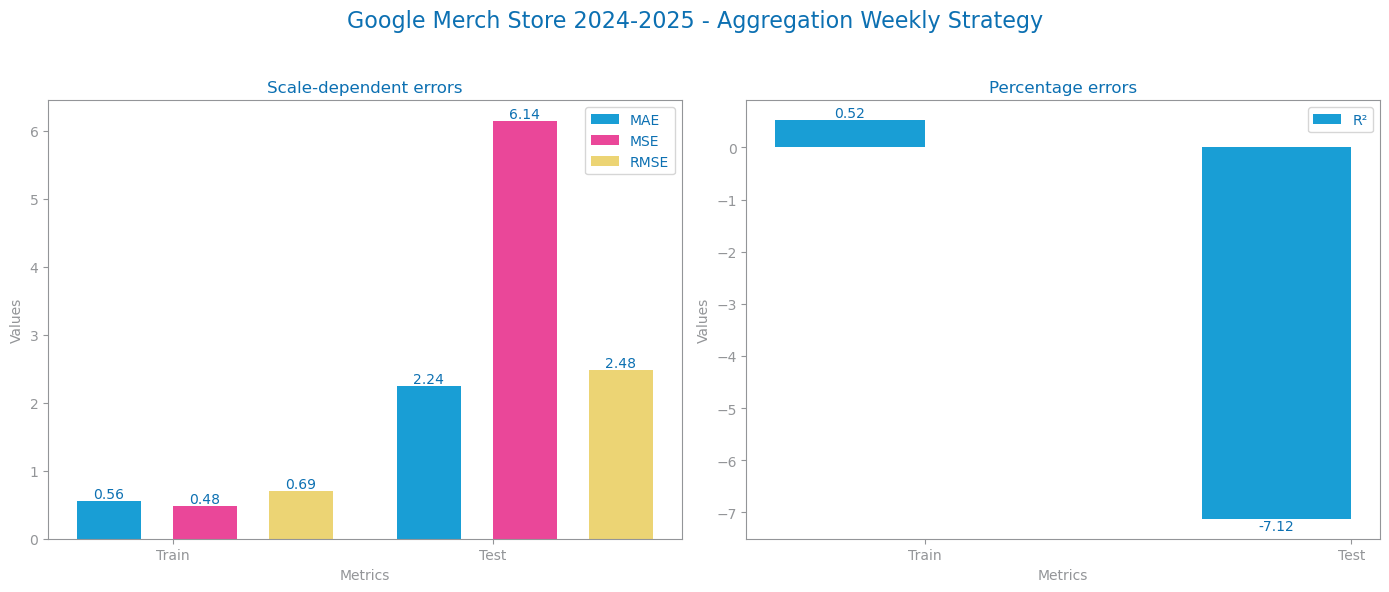

<Figure size 640x480 with 0 Axes>

In [7]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Aggregation Weekly Strategy")
savefig(f"images/{file_tag}_linear_regression_agg_weekly.png")

## Aggreagation Weekly Plot

<Axes: xlabel='Date', ylabel='Sessions'>

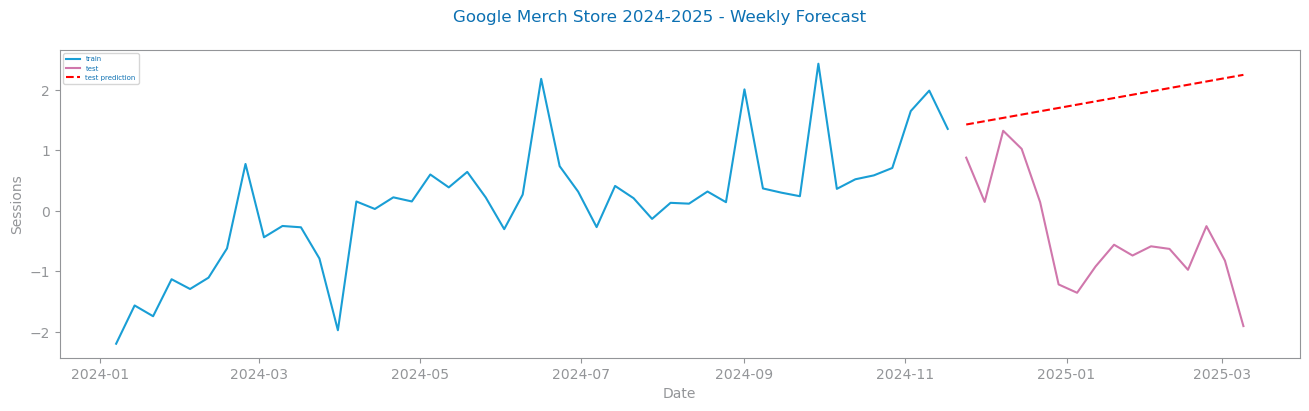

In [8]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Weekly Forecast",
    xlabel='Date',
    ylabel=target,
)

# Aggregation - Monthly

## Aggregation Monthly Strategy Application

In [9]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    
    df_copy=unscaled_monthly.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)

    
    
    return df_zscore

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Aggregation Monthly evaluate

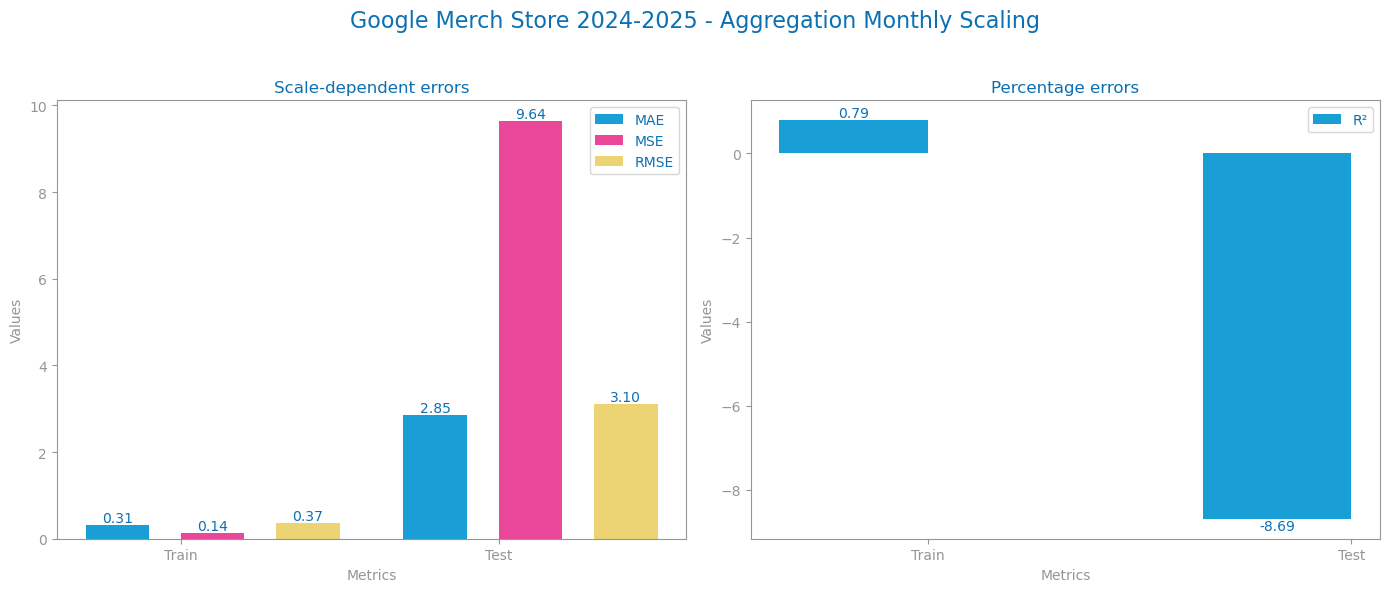

<Figure size 640x480 with 0 Axes>

In [10]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_2.index).intersection(set(test_2.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Aggregation Monthly Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_agg_monthly.png")

## Aggregation Monthly Plot

<Axes: xlabel='Date', ylabel='Sessions'>

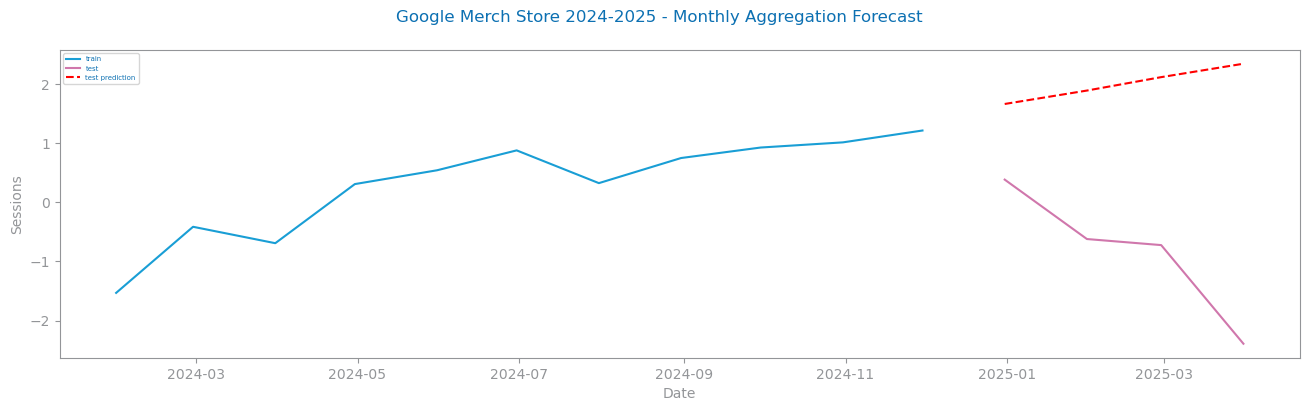

In [11]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Monthly Aggregation Forecast",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["Daily Aggregation", "Weekly Aggregation", "Monthly Aggregation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                 Model       MAE       MSE      RMSE        R²        MAPE
0    Daily Aggregation  1.836036  4.138962  2.034444 -3.999728  386.857027
1   Weekly Aggregation  2.238549  6.136649  2.477226 -7.124142  397.133938
2  Monthly Aggregation  2.845489  9.635150  3.104054 -8.689607  332.260411


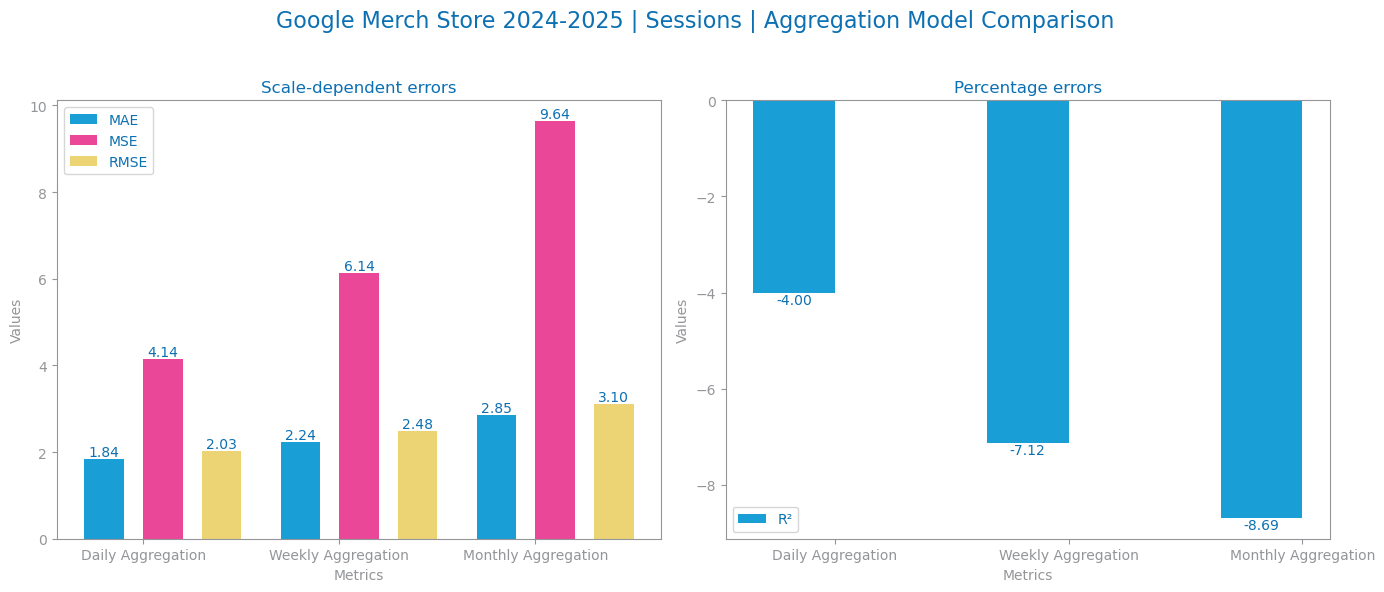

In [13]:
plot_performance_metrics(metrics, title=f"{file_tag} | {target} | Aggregation Model Comparison")

# save to csv

In [14]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    # data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_agg_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess